# 2. Iris의 세 가지 품종, 분류해볼 수 있겠어요?
- scikit-learn을 활용
    - 머신러닝, 지도학습의 분류 모델을 학습시키고 예측 시키기
- 모델의 성능을 평가하는 지표의 종류 이해, 활용, 확인
- Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델

## 1) 붓꽃 분류 문제
- petal: 꽃잎, sepal: 꽃받침
- 붓꽃의 세 가지 종류: setosa, versicolor, virginica
- 머신러닝 기법 활용하여 붓꽃 분류하기

#### - 세 가지의 붓꽃은 모두 꽃잎과 꽃받침의 크기가 조금씩 다른데, 머신러닝으로 분류가 가능할까?

### (1) 붓꽃 분류, 어떤 데이터로 할 건데?
- 사이킷런(scikit-learn) 에 내장되어 있는 데이터 : https://scikit-learn.org/stable/datasets.html
- 간단하고 작은 데이터셋 Toy datasets:  boston, iris, diabetes, digits, linnerud, wine, breast cancer의 7가지 데이터셋
- 비교적 복잡하고 현실 세계를 반영한 Real world datasets:  olivetti faces, 20newsgroups, covtype, california housing 등 총 9가지 데이터셋

- 이 중 Toy datasets의 iris 데이터셋을 사용할 것!
    - 공식 문서에 따르면, 이 데이터셋에는 총 150개의 데이터가 있고, 각 데이터에는 4개의 정보가 담겨있으며, Iris의 세 가지 품종, 분류해볼 수 있다. 
    - sepal, petal 각각의 길이와 폭, 총 네 가지의 정보이다.
    - 또한 카테고리를 나타내는 클래스는 setosa, versicolour, virginica 세 가지이다.

### 데이터셋 다루기 전 주의:
데이터셋의 정보를 먼저 확인하는 것이 중요하다. 데이터를 얼마나 이해하고 있느냐는 그 데이터를 활용한 결과와 성능에 중대한 요소가 되기 때문이다. 데이터셋이 담고 있는 정보를 먼저 잘 확인하고 시작해야 한다.

## 2) 데이터 준비, 그리고 자세히 살펴보기는 기본!

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(dir(iris))) # dir()는 객체가 어떤 변수와 매서드를 가지고 있는지 나열함

<class 'list'>


In [2]:
# 어떤 정보가 있나?
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# 가장 중요한 데이터를 변수에 저장하고 크기를 확인하자.
iris_data = iris.data
print(iris_data.shape) 
#shape는 배열의 형상정보를 출력, 150개의 데이터가 4개의 정보를 가지고 있다.

(150, 4)


In [6]:
# 샘플로 하나만 확인
iris_data[0]
# 순서대로 sepal length , sepal width , petal length , petal width의 값이다.

array([5.1, 3.5, 1.4, 0.2])

- 우리의 문제는 꽃잎과 꽃받침의 길이가 주어지는 경우 그 꽃은 세 가지의 붓꽃 품종 중 어떤 것인지를 맞추는 것(setosa, versicolor, virginica 세 가지 중 붓꽃의 종류가 무엇인지 맞추고자 함)이므로,
-  머신러닝 모델에게 꽃잎, 꽃받침의 길이와 폭 정보를 입력했을 때 붓꽃의 품종을 출력하도록 학습을 시켜야 한다.


- 머신러닝 모델이 출력해야 하는 정답을 **라벨(label)**, 또는 **타겟(target)** 이라고 한다.

In [7]:
iris_label = iris.target
print(iris_label.shape) # 총 150개의 데이터
iris_label # 각 값은 0, 1, 또는 2

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# 라벨의 이름
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# 데이터셋의 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
# 4개의 각 feature
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# 데이터셋 파일이 저장된 경로
iris.filename

'C:\\ProgramData\\Anaconda3\\envs\\py3_7_6\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

# 2. 첫번째 머신러닝 실습_Iris 간단하고도 빠르게!
## 1) 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비
- pandas: 
    -  파이썬에서 표 형태로 이루어진 2차원 배열 데이터를 다루는 데에 가장 많이 쓰이는 도구
    -  표 데이터를 활용해서 데이터 분석 또는 대형 데이터의 여러 통계량을 다루기에도 최적화가 되어있음
    
    
- iris 데이터 또한 행과 열이 있는 2차원 데이터

In [12]:
import pandas as pd
print(pd.__version__)

1.2.4


#### - 붓꽃 데이터셋을 DataFrame  자료형으로 변환하기
- __주의:  feature, label, target__

In [14]:
#  data 에는 iris_data 를 넣어주고, 각 컬럼에는 feature_names 로 이름을 붙인다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# 정답 데이터도 label 컬럼으로 추가한다.
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##### 정답 데이터가 있는 label 컬럼을 제외한 나머지 4개의 feature 데이터들은 머신러닝 모델이 풀어야 하는 문제지다.

- 문제지 : 머신러닝 모델에게 입력되는 데이터(feature). 변수 이름으로는 __X__ (대문자)
- 정답지 : 머신러닝 모델이 맞추어야 하는 데이터(label 또는 target). 변수 이름으로는 __y__ (소문자)

#### - 데이터셋 분리: train_test_split () 함수

머신러닝 모델을 학습시키려면, __학습에 사용하는 training dataset__ 과 __모델의 성능을 평가하는 데 사용하는 test dataset__ 으로 데이터셋을 나누는 작업이 필요하다.


우리에게는 150개의 데이터가 있지만, 이 150개를 모두 학습시키는 데에 사용해버리면 학습이 완료된 모델의 성능을 공정하게 평가할 수 없기 때문이다.

In [21]:
from sklearn.model_selection import train_test_split

# 4개의 feature 데이터만 있는 X, lable 데이터만 있는 y으로 설정하고
# X에는 데이터셋을 머신러닝 모델에 입력
# 그에 따라 모델이 내뱉는 품종 예측 결과를 정답인 y와 비교하며 학습 시킬 것
X_train, X_test, y_train, y_test = train_test_split(iris_data, # 문제지
                                                    iris_label, # 정답값
                                                    test_size=0.2, # 8:2 비율
                                                    random_state=7) 

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


- random_state란?
    - train 데이터와 test 데이터를 분리(split)하는데 적용되는 랜덤성을 결정
    - 데이터를 분리할 때 랜덤으로 섞는 과정이 필요하고 그 역할을 함
    - 아무리 랜덤이라고 해도 특정 로직에 따라 결정되는 랜덤이기 때문에 완벽한 랜덤이라고 할 수 없음
    - 같은 의미로 random_seed도 있음. 내가 실험한 결과를 다른 사람의 컴퓨터에서도 재현가능(reproducible) 하게 하려면 같은 랜덤시드가 필요할 때가 있음

In [22]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [23]:
X_test.shape, y_test.shape # 8:2 비율로 섞임

((30, 4), (30,))

In [24]:
y_train, y_test # 위와 다르게 무작위로 섞임(train_test_split()의 영향)

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

## 2) 첫 번째 머신러닝 모델 학습시키기
- 머신러닝 
    - 지도 학습: 정답이 있는 문제에 대해 학습하는 것
         - 분류: 입력받은 데이터를 특정 카테고리 중 하나로 분류함
         - 회귀: 입력받은 데이터에 따라 특정 필드의 수치를 맞춤
    - 비지도 학습: 정답이 없는 문제를 학습하는 것
    

- __붓꽃 품종 문제는 지도학습인가, 비지도학습인가?__
    - 지도학습. 붓꽃 품종에 대한 정답이 존재하기 때문
        

- __붓꽃 품종 문제는 분류 문제인가, 회귀 문제인가?__
    - 분류 문제.세 가지 품종 중 하나로 분류하는 문제이기 때문

- label이라는 정답지가 있으니 모델이 지도받을 수 있다. 즉, 붓꽃 품종 문제는 지도학습에 해당한다. 

- 붓꽃 품종 문제는 feature 데이터를 입력받으면 setosa, versicolor, virginica 세 가지 품종 중 하나로 분류해내는, 분류 문제이다.

#### 분류와 회귀의 예시
- 분류 : 환자의 나이, 병력, 혈당 등을 입력받아 암의 양성/음성을 판정하는 문제
- 회귀 : 택시를 탄 시각, 내린 시각, 출발지, 도착지, 거리 등을 입력받아 택시 요금을 맞추는 문제. 집에 대한 정보(평수, 위치, 층수 등)를 입력받아 그 집의 가격을 맞추는 문제

### 정리해본다면,
우리가 해결하고자 하는 붓꽃 문제:
- 첫 번째, 머신러닝 중 정답이 있고 그 정답을 맞추기 위해 학습하는 지도 학습(Supervised Learning)이며,
- 지도학습 중에서는 특정 카테고리 중 주어진 데이터가 어떤 카테고리에 해당하는지를 맞추는 분류(Classification) 문제

__어떤 머신러닝 모델을 써야하는가?__
 - 지도학습 중에서도 분류를 할 수 있는 모델을 사용하면 된다.

### 1. Decision Tree 모델
- 직관적이면서도 간단하게 사용할 수 있음
- 분류 문제를 풀 때 가장 기본적으로 쓰이는 모델 중 하나
- 의사 결정을 할, 즉 데이터를 분리할 어떤 경계를 찾아내어 데이터를 체에 거르듯 한 단계씩 분류해나가는 모델
- __필요 개념: 엔트로피, 정보량, 지니불순도 등의 정보이론 개념__


- https://ratsgo.github.io/machine%20learning/2017/03/26/tree/


- 의사결정트리:
    - 데이터를 분리해나가는 모습이 나무를 뒤집어놓은 것과 같은 모양
    - 단점: 결정경계가 데이터 축에 수직이어서 특정 데이터에만 잘 작동, 이를 극복하기 위해 제안된 모델이 Random Forest이며, 여러 개의 Decision Tree를 합쳐서 만들어놓은 개념

In [25]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)

print(decision_tree._estimator_type)

classifier


- __keyword: fit()__

In [26]:
# 이미 설계된 API구조이기에 바로 학습 시키기
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

- 매서드 fit()
    - training dataset 으로 모델을 학습시킨다는 것은, 달리 말하면 training dataset에 맞게 모델을 fitting, 즉 맞추는 것이다.
    - training dataset에 있는 데이터들을 통해 어떠한 패턴을 파악하고, 그 패턴에 맞게 예측을 할수 있도록 학습되기 때문이다.
    - 면 모델은 training dataset에 존재하지 않는 데이터에 대해서는 정확한 정답 카테고리가 무엇인지 알지 못한다.
    - training dataset을 통해 학습한 패턴으로 새로운 데이터가 어떤 카테고리에 속할지 예측할 뿐이다.

## 3) 첫 번째 머신러닝 모델 평가하기

In [27]:
# test 데이터로 예측하기
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

X_test 데이터에는 정답인 label이 없고 feature 데이터만 존재했다. 따라서 학습이 완료된 decision_tree 모델에 X_test 데이터로 predict 를 실행하면 모델이 예측한 y_pred를 얻게 된다.

In [28]:
# 실제 정답과 비교하기
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

#### - 예측한 결과에 대한 수치를 조금 더 편리하게 확인할 수 있는 방법
__정확도__ : 성능을 평가하는 방법의 척도

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

accuracy
# 정확도 = 예측 결과가 정답인 데이터의 개수 / 예측한 전체 데이터의 개수
# 즉, 전체 개수 중 맞은 것의 개수의 수치

0.9

In [30]:
 30 * 0.9
# 모델 30개 대해 예측한 것 중 맞은 게 27개

27.0

# 3. 다른 모델로 실습해보기_iris
## 4) 다른 모델도 해 보고 싶다면? 코드 한 줄만 바꾸면 돼!
편리하게 설계된 scikit-learn 덕분에 아주 간단하다. 익숙해지면 심지어 한 줄의 코드만 수정해도 된다.




### 다른 모델들을 다루기 전에 위에서 사용했던 Decision Tree 모델을 학습시키고 예측하는 과정 정리

### (1) 필요한 모듈 import

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### (2) 데이터 준비

In [32]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

### (3) train, test 데이터 분리

In [34]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=7)

### (4) 모델 학습 및 예측

In [36]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



### 여기서 모델을 바꿔보고 싶다면 (4) 모델 학습 및 예측 부분에서 모델만 바꿔주면 된다.

### 2. RandomForest
-  Decision Tree 모델을 여러개 합쳐놓음으로써 Decision Tree의 단점을 극복한 모델
-  앙상블(Ensemble) 기법: 
    - 단일 모델을 여러 개 사용하는 방법을 취함으로써 모델 한 개만 사용할 때의 단점을 집단지성으로 극복하는 개념이다.
    
    
- https://medium.com/@deepvalidation/title-3b0e263605de


-  Random Forest는 여러개의 의사 결정 트리를 모아 놓은것으로, 각각의 의사 결정 트리를 만들기 위해 쓰이는 특성들을 랜덤으로 선택한다.
- 이는 상위 모델들이 예측하는 편향된 결과보다, 다양한 모델들의 결과를 반영함으로써 더 다양한 데이터에 대한 의사결정을 내릴 수 있게 한다.

In [37]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=25)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### 3. Support Vector Machine (SVM)
- https://excelsior-cjh.tistory.com/66?category=918734

In [40]:
from sklearn import svm
svm_model = svm.SVC()
print(svm_model._estimator_type)

# 학습시키고
svm_model.fit(X_train, y_train)

# 결과 확인
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 4. Stochastic Gradient Descent Classifier (SGDClassifier)
- https://scikit-learn.org/stable/modules/sgd.html
- (링크 안됨)https://datascienceschool.net/view-notebook/342b8e2ecf7a4911a727e6fe97f4ab6b/
- https://everyday-deeplearning.tistory.com/entry/SGD-Stochastic-Gradient-Descent-%ED%99%95%EB%A5%A0%EC%A0%81-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95
- https://developers.google.com/machine-learning/crash-course/reducing-loss/stochastic-gradient-descent?hl=ko

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00        13
           2       0.40      1.00      0.57         8

    accuracy                           0.57        30
   macro avg       0.43      0.67      0.51        30
weighted avg       0.38      0.57      0.44        30



C:\ProgramData\Anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5. Logistic Regression
- http://hleecaster.com/ml-logistic-regression-concept/
-  회귀를 사용하여 데이터가 어떠한 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도학습 알고리즘
- 예) 스팸 메일 분류기,  데이터가 2개의 범주(ex. 스팸인지 아닌지) 중 하나에 속하도록 결정하는 것을 2진 분류

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



C:\ProgramData\Anaconda3\envs\py3_7_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 4 오차행렬_iris
## 4) 내 모델은 얼마나 똑똑한가? 다양하게 평가해보기
머신러닝에서는 모델을 학습시키는 것뿐만 아니라 그 성능을 정확히 평가하고 개선하는 것이 매우 중요하다. 모델의 성능을 평가하는 데에는 정확도뿐만 아니라 다른 척도들이 존재한다.

### (1) 정확도에는 함정이 있다

In [44]:
from sklearn.datasets import load_digits

digits = load_digits() # digit에 손글씨 데이터 저장
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [45]:
digits_data = digits.data
digits_data.shape # 총 1797개가 있고, 각 데이터는 64개의 숫자로 이루어짐

(1797, 64)

In [47]:
# 샘플 확인
digits_data[0] #64개의 숫자로 이루어진 배열

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

손글씨 데이터는 이미지 데이터이다. 따라서 각 숫자는 픽셀값을 의미하며, 길이 64의 숫자 배열은 사실 8 x 8 크기의 이미지를 일렬로 쭉 펴놓은 것을 의미한다.


이미지는 다음과 같이 간단히 확인할 수 있다. 다만, 일렬로 펴진 64개 데이터를 (8, 8)로 reshape 해줘야 한다!

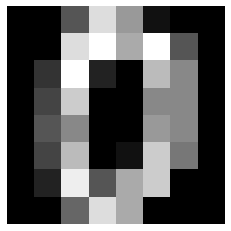

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

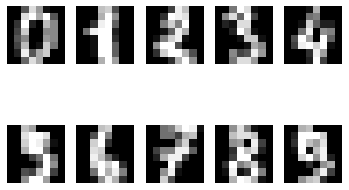

In [49]:
# 여려 개 이미지 확인해보기 

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [50]:
# 타깃 데이터는? 
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- 우리의 문제는:
    - 붓꽃 문제와 같이, 각 이미지 데이터가 입력되었을 때 그 이미지가 숫자 몇을 나타내는 이미지인지를 맞추는 분류 모델을 학습시키면 된다.


- 다만 정확도의 함정을 알아보는 문제이므로,
    - 숫자 10개를 모두 분류하는 것이 아니라, 해당 이미지 데이터가 3인지 아닌지를 맞추는문제로 변형해서 풀어볼 것이다.
    - 입력된 데이터가 3이라면 3을, 3이 아닌 다른 숫자라면 0을 출력하도록 하는 모델로 말이다

In [51]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

##### 문제: digits_data와 new_label로 Decision Tree 모델을 학습시키고, 정확도를 확인해 보세요.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=7)


decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       326
           3       0.77      0.88      0.82        34

    accuracy                           0.96       360
   macro avg       0.88      0.93      0.90       360
weighted avg       0.97      0.96      0.96       360



##### 정답

In [53]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

우리는 총 10개의 숫자 중 3에만 집중을 해서, 3이라면 3으로, 3이 아니라면 0으로 맞추는 문제로 변형했었다. 그런 이유로, 정답 데이터인 label은 0이 굉장히 많고 3은 적은 불균형 데이터가 되었다. 9개의 숫자들은 label이 모두 0이 되었고, 3만 3으로 남아있었으니 대략 90%의 label이 모두 0이라는 소리다.


__모델이 전혀 학습하지 않고 정답을 모두 0으로만 선택해도 정확도가 90%가량이 나오게 된다는 것!__

In [54]:
# 길이는 y_pred 와 같으면서 0 으로만 이루어진 리스트
fake_pred = [0] * len(y_pred)
accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

- 이러한 문제는 불균형한 데이터, unbalanced 데이터에서 많이 발생할 수 있다.
- 정확도는 정답의 분포에 따라 모델의 성능을 잘 평가하지 못하는 척도가 될 수 있는 것이다.
- 그렇기에 분류 문제에서는 정확도 외에 다양한 평가 척도를 사용한다.

### (2) 정답과 오답에도 종류가 있다!
-  정확도는 전체 데이터 중 맞은 데이터 만 신경쓰는 척도이다.
- 얼마나 많은 양성 데이터를 맞았느냐도 중요하겠지만, 음성 데이터를 얼마나 안 틀렸느냐도 중요한 경우가 있다.


-  같은 오진이라도 양성을 잡아내는 데에 실패하는 오진과, 음성을 잡아내는 데에 실패하는 오진은 그 중요도가 다를 수 있다.
- __오차행렬(confusion matrix): 정답과 오답을 구분하여 표현하는 방법__
- https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

- 실제 클래스(Actual Class)
    - Actual Class가 Positive라면 환자는 실제 코로나에 걸린 것
    - 반대로 Actual Class가 Negative라면 환자는 건강함
- 예측된 클래스(Predicted Class)
    - Predicted Class가 Positive라면 진단 결과가 양성
    - Negative라면 진단 결과가 음성

- TP(True Positive) : 실제 환자에게 양성판정 (참 양성)
- FN(False Negative) : 실제 환자에게 음성판정 (거짓 음성)
- FP(False Positive) : 건강한 사람에게 양성판정 (거짓 양성)
- TN(True Negative) : 건강한 사람에게 음성판정 (참 음성)


- TP, FN, FP, TN의 수치로 계산되는 성능 지표 중 대표적으로 쓰이는 것은 __정밀도(Precision), 재현율(Recall, Sensitivity), F1 스코어(f1 score)__

#### # 공식

- 정밀도(Precision) : TP / FP+TP


- 재현율(Recall, Sensitivity) : TP / FN+TP


- F1 스코어(f1 score) : 2 / ((1/Recall)+(1/Precision))


- 정확도(Accuracy) : TP + TN / TP + TN + FP + FN

1) 
- Precision과 Recall의 분자는 둘 다 TP다. TP는 맞게 판단한 양성이므로, 이 값은 높을수록 좋다.
- 분모에는 각각 FP와 FN가 있다. 이 값들은 잘못 판단된 것들이므로 낮을수록 좋다.
- 즉, TP는 높고 FP또는 FN이 낮을수록 좋은 예측이므로, Precision과 Recall 값이 클수록 좋다. 

2)
- Precision은 분모에 있는 FP가 낮을수록 커진다. Precision이 높아지려면 False Positive, 즉 음성인데 양성으로 판단하는 경우가 적어야 한다.
- Recall은 분모에 있는 FN이 낮을수록 커진다. Recall이 높아지려면 False Negative, 즉 양성인데 음성으로 판단하는 경우가 적어야 한다.

#### 다시 생각해보자
- Precision이 크려면 음성인데 양성으로 판단하는 경우가 적어야 한다. 음성을 놓치지 말아야 한다건데, 어떤 경우일까?
    - 메일 처리 모델은 스팸 메일을 못 거르는 것은 괜찮지만, 정상 메일을 스팸 메일로 분류하는 것은 더 큰 문제입니다. 즉, 음성을 양성으로 판단하면 안된다. 따라서 Precision이 더 중요하다.


- Recall이 크려면 양성인데 음성으로 판단하는 경우가 적어야 한다. 양성을 놓치지 말아야 하는데 어떤 경우가 있을까?
    - 암을 진단하는 경우 실제 환자를 한 명이라도 놓치면 안된다. 즉, 양성을 음성으로 판단하면 안 되기 때문에 Recall이 더 중요하다.

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)
# 왼쪽 위부터 순서대로 TP, FN, FP, TN의 개수
# 손글씨 문제에서의 `0`은 Positive 역할을, `3`은 Negative 역할
# TP와 TN의 값이 320, 18로 비교적 크고 FN과 FP는 13, 9로 작다.

array([[320,  13],
       [  9,  18]], dtype=int64)

In [60]:
# 모든 숫자를 0으로 예측한 fake_pred는?
confusion_matrix(y_test, fake_pred)
#  Positive로 예측했고 Negative로 예측한 것은 없기 때문에 FN과 TN은 둘다 0

array([[333,   0],
       [ 27,   0]], dtype=int64)

In [61]:
# 이런 경우 Precision, Recall, f1 score는 각각 얼마가 될까?
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



0 에 대한 precision과 recall은 0.93, 1로 매우 높지만 3 에 대한 precision과 recall은 둘 다 0이라는 것은, 0 은 잘 잡아내지만, 3 은 단 하나도 맞추지 못했다는 뜻이다.

In [62]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

### 결론
- 모델의 성능은 정확도만으로 평가하면 안된다! 특히, label이 불균형하게 분포되어있는 데이터를 다룰 때에는 더 조심해야 한다.
- Precision과 Recall이 각각 언제 중요해지는지를 이해하고, 때에 맞는 성능지표로 모델을 평가를 해야 한다.

- 평가 부분에서 이해 봅기 위한 블로그
https://shate-programming.tistory.com/28

1) precision(정밀도): 어떠한 클래스(예시: 클래스 A)로 분류한 데이터 중 실제로 클래스 A일 비율 (높을수록 좋다.)

>> 즉, 정밀도는 예측한 데이터 셋 중 얼마나 실제와 일치하는 지 보는 것

2) recall(재현율): 실제 클래스 A에 속한 데이터 중 클래스 A로 예측한 표본의 수 비율 (높을수록 좋다.)

>> 즉, 재현율은 실제 데이터 셋 중 여러 개의 데이터에 대해 하나의 클래스로 잘 분류할 수 있는 지 보는 것

3) F-Score: 정밀도와 재현율의 가중조화평균으로 구한다. 공식은 아래와 같다. 모델의 평균적인 성능 비교 시 유용

F1-score = (2precisionrecall) / (precision + recall)

4) accuracy(정확도): 전체 샘플 중 올바르게 예측한 샘플 수의 비율 (높을수록 좋다.) 하지만 데이터 편향되어 있다면 유용하지 않을 수 있다.

_다중 클래스 분류_의 경우 각각의 클래스에 대해 자신을 양성 클래스, 다른 클래스를 음성 클래스로 가정하는데 각 클래스별로 구한 정밀도, 재현율, F1-score의 평균 점수를 구해야 한다.

5) macro avg: 단순 평균

6) weighted avg: 각 클래스에 속하는 표본의 갯수로 가중평균

http://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html

--- seYi